# COGS 108 - Data Checkpoint

# Names

- Annie Huang
- Andrew Cheng
- Lauren Sidarto
- Isaac Otero

<a id='research_question'></a>
# Research Question
What features [time, number of ingredients, number of steps, etc.] of a dinner recipe are most predictive of its star rating?

# Dataset(s)
Dataset: recipes.csv 

We utilized web scraping on http://allrecipes.com/ in order to build our dataset, so there is no link. The file name is recipes.csv. 

1386 observations after cleaning the dataset. 

This dataset contains recipe information from allrecipes.com. We included information on factors that we believed could have a significant influence on recipe star rating, such as number of ingredients, number of steps in a recipe, and the word count per step. 

We do not plan to use multiple datasets.

# Setup

In [2]:
from bs4 import BeautifulSoup
import requests
import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import seaborn as sns

# Scraping the Data


In [30]:
#constants
url = 'http://allrecipes.com/recipes/'
urls_to_scrape = []
categories = []

In [31]:
# collecting urls to scrape
ends = ['17057/everyday-cooking/more-meal-ideas/5-ingredients/main-dishes/',
        '15436/everyday-cooking/one-pot-meals/',
        '455/everyday-cooking/more-meal-ideas/30-minute-meals/',
        '94/soups-stews-and-chili/',
        '16099/everyday-cooking/comfort-food/',
        '80/main-dish/',
        '22992/everyday-cooking/sheet-pan-dinners/',
        '78/breakfast-and-brunch/',
        '17561/lunch/',
        '84/healthy-recipes/',
        '76/appetizers-and-snacks/',
        '96/salad/',
        '81/side-dish/',
        '156/bread/',
        '77/drinks/',
        '79/desserts/',
        '201/meat-and-poultry/chicken/',
        '200/meat-and-poultry/beef/',
        '205/meat-and-poultry/pork/',
        '93/seafood/',
        '1058/fruits-and-vegetables/fruits/',
        '95/pasta-and-noodles/',
        '1059/fruits-and-vegetables/vegetables/',
        '17562/dinner/',
       ]

cat = ['5-ingredient-main-dishes',
        'one-pot-meals',
        '30-minute-meals',
        'soups-stews-and-chili',
        'comfort-food',
        'main-dish',
        'sheet-pan-dinners',
        'breakfast-and-brunch',
        'lunch',
        'healthy-recipes',
        'appetizers-and-snacks',
        'salad',
        'side-dish',
        'bread',
        'drinks',
        'desserts',
        'chicken',
        'beef',
        'pork',
        'seafood',
        'fruits',
        'pasta-and-noodles',
        'vegetables',
        'dinner',
      ]


for e in ends:
    f = requests.get(url + e)
    soup = BeautifulSoup(f.text)

    try: 
        recipe_cards = soup.find('div', id="mntl-taxonomysc-article-list-group_1-0").findAll('a',href=True)
    except:
        recipe_cards = soup.find('div', id="tax-sc__recirc-list_1-0").findAll('a',href=True)

        
    temp = []
    for i in recipe_cards:
        temp.append(i['href'])
        urls_to_scrape.append(i['href'])
        categories.append(cat[ends.index(e)])

In [8]:
# save gathered urls to a csv. quality of life stuff
with open('urls_to_scrape.csv', 'w') as f:
    for x in urls_to_scrape:
        f.write(x+', ')

In [37]:
#read urls from csv
import csv
with open('urls_to_scrape.csv', newline='') as f:
    reader = csv.reader(f)
    urls_to_scrape = list(reader)
urls_to_scrape = urls_to_scrape[0][:-1] #the last line is a space so remove last url

IndexError: list index out of range

In [40]:
def scrape_recipe(u): 
#scraping individual parts of a recipe
    #recipe title
    f = requests.get(u)
    soup = BeautifulSoup(f.text)
    info = {}
    
    try:
        info["recipe_title"] = soup.findAll('h1')[0].text.strip()

        #review, rating
        temp = soup.findAll('div', {'id':'mntl-recipe-review-bar_1-0'})[0].text.split()
        info["star_rating"] = float(temp[0])
        info["rating_count"] = temp[1]
        info["review_count"] = temp[2]

        #cook time info
        temp = soup.findAll('div', {'class':'mntl-recipe-details__item'})
        for a in temp:
            spl = a.text.strip().split(":")
            info[spl[0]] = spl[1].strip()

        #recipe writeup
        writeup = ''
        for b in soup.find('div', {'id':'mntl-recipe-intro__content_1-0'}).findAll('p'):
            writeup += b.text.strip() + ' '
        info["writeup"] = writeup

        #ingredients
        ingr = []
        for c in soup.findAll('li',{'class':'mntl-structured-ingredients__list-item'}):
            ingr.append(c.text.strip())
        info["ingr"] = ingr

        #steps
        steps = []
        for step in soup.find('div',{'id':'recipe__steps_1-0'}).findAll('p',{'class':'comp mntl-sc-block mntl-sc-block-html'}):
            steps.append(step.text.strip())
        info['steps'] = steps

        #nutrition info - we decided against this
#         x=soup.findAll('td', {'class':'mntl-nutrition-facts-summary__table-cell'})
#         for d in range(len(x)-1):
#             if (d%2 ==0):
#                 info[x[d+1].text] = x[d].text
#             d+=1

    except:
        #if the recipe can't be scraped (e.g. it's one of those top 10 articles, 
        #or an article with no rating, then print the link)
        print(u) 
    return info



In [42]:
#scrape all recipes
rows = []
c = 0
for u in urls_to_scrape: 
    if (c%50 == 0):
        print(c)
        
    temp = scrape_recipe(u)
    temp['category'] = categories[urls_to_scrape.index(u)]
    rows.append(temp)
    c+=1

df = pd.DataFrame.from_dict(rows)
df.head()
df.to_csv('recipes.csv')

0
50
100
https://www.allrecipes.com/gallery/easy-one-dish-pork-chop-dinners/
https://www.allrecipes.com/recipe/212922/filipino-rice-arroz-valenciana/
150
200
250
300
https://www.allrecipes.com/gallery/the-best-tilapia-recipes/
https://www.allrecipes.com/gallery/best-traditional-christmas-dishes/
https://www.allrecipes.com/gallery/pulled-pork-sides/
https://www.allrecipes.com/gallery/make-and-freeze-casseroles/
https://www.allrecipes.com/gallery/side-dishes-hot-dogs/
https://www.allrecipes.com/gallery/stir-fry-sauces/
350
https://www.allrecipes.com/gallery/side-dishes-pork-chops/
https://www.allrecipes.com/gallery/the-best-sheet-pan-chicken-dinners/
https://www.allrecipes.com/gallery/healthy-sheet-pan-recipes-for-winter/
https://www.allrecipes.com/gallery/chicken-thigh-sheet-pan-dinner-recipes/
https://www.allrecipes.com/gallery/sheet-pan-shrimp-dinners/
https://www.allrecipes.com/gallery/super-easy-sheet-pan-suppers/
https://www.allrecipes.com/gallery/sheet-pan-fish-recipes/
400
https:

In [289]:
#read urls
df = pd.read_csv('recipes.csv')
df.head()

,Unnamed: 0,recipe_title,star_rating,rating_count,review_count,Prep Time,Cook Time,Total Time,Servings,Yield,writeup,ingr,steps,category,Additional Time,Chill Time,Marinate Time,Rest Time
0,0,World's Best Honey Garlic Pork Chops,4.4,(645),475,10 mins,15 mins,25 mins,6.0,6 servings,When you're in need of a quick and easy dinner...,"['½ cup ketchup', '2 ⅔ tablespoons honey', '2 ...",['Preheat grill for medium heat and lightly oi...,5-ingredient-main-dishes,NaN,NaN,NaN,NaN
1,1,Pan-Seared Tilapia,4.7,(789),560,5 mins,10 mins,15 mins,4.0,4 fillets,If you're looking for an easy weeknight dinner...,"['4 (4 ounce) tilapia fillets', 'salt and grou...",['Rinse tilapia fillets in cold water and pat ...,5-ingredient-main-dishes,NaN,NaN,NaN,NaN
2,2,Easy Baked Chicken Thighs,4.2,(194),135,5 mins,30 mins,35 mins,4.0,NaN,NaN,"['4 chicken thighs', '4 teaspoons garlic powd...",['Preheat the oven to 375 degrees F (190 degre...,5-ingredient-main-dishes,NaN,NaN,NaN,NaN
3,3,Chicken Cordon Bleu,4.6,"(2,668)","1,849",10 mins,35 mins,45 mins,4.0,4 servings,Don't feel like going out tonight? You can eas...,"['nonstick cooking spray', '4 skinless, bonel...",['Preheat oven to 350 degrees F (175 degrees C...,5-ingredient-main-dishes,NaN,NaN,NaN,NaN
4,4,Fluffy Microwave Scrambled Eggs,4.7,(60),58,5 mins,5 mins,10 mins,2.0,2 servings,Your microwave is the key to irresistibly fluf...,"['4 eggs', '¼ cup milk', '⅛ teaspoon salt']",['Break the eggs into a microwave-proof mixing...,5-ingredient-main-dishes,NaN,NaN,NaN,NaN


# Data Cleaning
We started with data scraped from allrecipes.com. We removed all recipes that had a Null value for star rating, as we are primarily interested in the relationship between star rating and various other recipe characteristics. For any Null values in other columns, we imputed them with zeros or replaced them with the average for that category/column, depending on what made sense contextually. For example, Null review counts were replaced with zeros, while Null recipe cook times were replaced with the average cook time for the recipe category. We converted all numerical columns into int or float types and made sure all numbers utilized uniform units. For example, we converted all hours and days under cook time into minutes. We replaced the ingredient list and list of steps with the ingredient/step count, and added a column for word count per step.

In [138]:
df.shape

(1440, 18)

In [290]:
#drop rows with null ratings
df = df[df['star_rating'].notna()]

#strip rating and review columns 
df['rating_count'] = df['rating_count'].str.slice(1,-1)
df['rating_count'] = df['rating_count'].str.replace(',','', regex = True)
df['review_count'] = df['review_count'].str.replace(',','', regex = True)

#turn rating and review columns into floats
replace = []
df = df.reset_index(drop = True)
for i in df.index:
    temp = df['ingr'][i]
    temp = temp.split('\'')[1::2]
    replace.append(len(temp))
for i in range(len(replace)):
    df.iloc[i, 11] = replace[i]
    
df = df.astype({'rating_count': 'float64', 'review_count': 'float64', 'ingr': 'int'})

In [291]:
#convert prep, cook, and total time columns into minutes 

#Time quantities in minutes
time_length = [1, 60, 60 * 24, 60 * 24 * 365]

# Param: Time is string or null (mins, hrs, days)
# Return: Total time in minutes
def time_to_int(time):
    #Check if not string will have to null input later
    if type(time) != str:
        return np.NaN
    
    #Gets the digits of all times in mins, hrs, days, etc.
    times = re.findall('\d+', time)[::-1]
    
    #Sums up each time and multiplies it by the number of mins in that time
    return sum([int(times[i]) * time_length[i] for i in range(len(times))])

#Converts prep time, cook time, and total time to int values
df['Prep Time'] = df['Prep Time'].apply(time_to_int)
df['Cook Time'] = df['Cook Time'].apply(time_to_int)
df['Total Time'] = df['Total Time'].apply(time_to_int)

In [315]:
#ftotal_steps_character and number_of_steps
df['steps'] = df['steps'].apply(lambda x: x.strip('[]').replace("\\"," ").replace("\"","").replace('\'',''))
df['number_of_steps'] = df['steps'].apply(lambda x: len(x.split(".,")))
   
#finding average_step_length 
df['average_step_len'] = df['steps'].apply(lambda x: len(x.replace(".,",",")))
df['average_step_len'] = df['average_step_len']/df['number_of_steps']

In [318]:
#turning writeup into length
df['writeup']=df['writeup'].fillna('')
df.writeup = df.writeup.apply(lambda x: len(x))

In [319]:
#drop unused columns: index, additional time, chill time, marinate time, rest time, yield
df = df.drop(columns=['Unnamed: 0','Additional Time','Chill Time','Marinate Time','Rest Time','Yield'], axis=1)

#rename columns to have consistent names
df = df.rename({"Prep Time":"prep_time","Cook Time":"cook_time","Total Time":"total_time", "Servings":"servings"},axis=1)

Null imputation

In [321]:
#all time columns have null values
df.isna().any()

recipe_title        False
star_rating         False
rating_count        False
review_count        False
prep_time            True
cook_time            True
total_time           True
servings            False
writeup             False
ingr                False
steps               False
category            False
number_of_steps     False
average_step_len    False
dtype: bool

In [322]:
#some of the null rows under "prep_time" column
df[df['prep_time'].isna()].head()

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
67,Scrambled Eggs in a Mug,4.5,43.0,32.0,NaN,5.0,5.0,1.0,0,3,Whisk egg in a microwave-safe mug. Whisk in mi...,one-pot-meals,2,96.500000
316,Brined and Roasted Whole Turkey,4.7,23.0,17.0,NaN,NaN,800.0,10.0,0,8,Overnight Brine: Combine Morton®Kosher Salt an...,main-dish,7,224.714286
458,Egg in a Hole,4.7,358.0,301.0,NaN,5.0,5.0,1.0,0,4,Melt bacon grease in a nonstick pan over low h...,breakfast-and-brunch,2,174.500000
710,Buffalo Chicken Wing Sauce,4.8,845.0,649.0,NaN,5.0,5.0,8.0,3244,7,"Combine hot sauce, butter, vinegar, Worcesters...",side-dish,1,290.000000
898,Soft Pumpkin Cookies,3.3,62.0,48.0,NaN,NaN,NaN,12.0,0,9,Preheat oven to 375 degrees F (190 degrees C)....,desserts,4,57.750000


We decided it would make sense to impute NaNs with the mean of the cook time under each category of food. For example, a NaN time for a drink will have the average cook time for a drink.

In [323]:
#Gets the mean time for each category for prep cook and total time
mean_time = df[['category','prep_time', 'cook_time', 'total_time']].groupby('category').transform('mean').round(2)
#Imputes the mean times of each category for the missing values
df = df.fillna(mean_time)
df.isna().any()

recipe_title        False
star_rating         False
rating_count        False
review_count        False
prep_time           False
cook_time           False
total_time          False
servings            False
writeup             False
ingr                False
steps               False
category            False
number_of_steps     False
average_step_len    False
dtype: bool

In [324]:
df.shape

(1386, 14)

There are some duplicate recipes. We drop these by using df.duplicated():

In [325]:
df = df.loc[~df.duplicated(subset=None, keep='first')].reset_index(drop=True)

In [327]:
df.to_csv('recipes_clean.csv')

## EDA

We first read the saved data back into a dataframe. The dataset has 1020 recipes in it, after cleaning (including deduplication and removal of null rows).

In [4]:
#reading data in
df = pd.read_csv('recipes_clean.csv').drop(columns="Unnamed: 0",axis=1)
df.shape

(1020, 14)

In [62]:
df.loc[df.recipe_title == "Three Berry Pie"]

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
786,Three Berry Pie,4.6,478.0,391.0,45.0,45.0,4950.0,8.0,0,9,Make the crust: Combine flour and salt in a la...,desserts,8,243.0


We first started by calculating basic descriptive statistics for the dataset. Notably, the range of star ratings ranges from 2.3 - 5 stars. There are also some interesting outliers - the recipe with the longest cook_time has a cook_time of 625 minutes, and the recipe with the longest total_time has a total time of 11535 minutes (8 days).

In [61]:
#get basic descriptive statistics for the dataset
df.describe()

,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,number_of_steps,average_step_len
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,4.588039,893.648039,669.589216,14.652637,31.844588,104.275137,8.877451,755.692157,8.781373,4.408824,149.756137
std,0.231889,1771.111268,1306.444361,8.512378,48.921489,441.540736,12.325870,1348.200763,3.914223,2.098768,47.263181
min,2.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,48.333333
25%,4.500000,81.750000,65.000000,10.000000,10.000000,20.000000,4.000000,0.000000,6.000000,3.000000,117.083333
50%,4.600000,298.000000,239.000000,15.000000,20.000000,40.000000,6.000000,0.000000,8.000000,4.000000,140.410714
75%,4.700000,988.500000,748.250000,20.000000,34.482500,80.000000,10.000000,1609.250000,11.000000,6.000000,173.031250
max,5.000000,19800.000000,14420.000000,90.000000,625.000000,11535.000000,272.000000,6374.000000,28.000000,13.000000,455.000000


We look at the distribution of all the numerical variables. We note the right skew on the distribution of star_ratings - the fact that most recipes fall between 4 - 5 stars may affect our analysis. Additionally, all the time-related and ingredient related columns have a left skew.

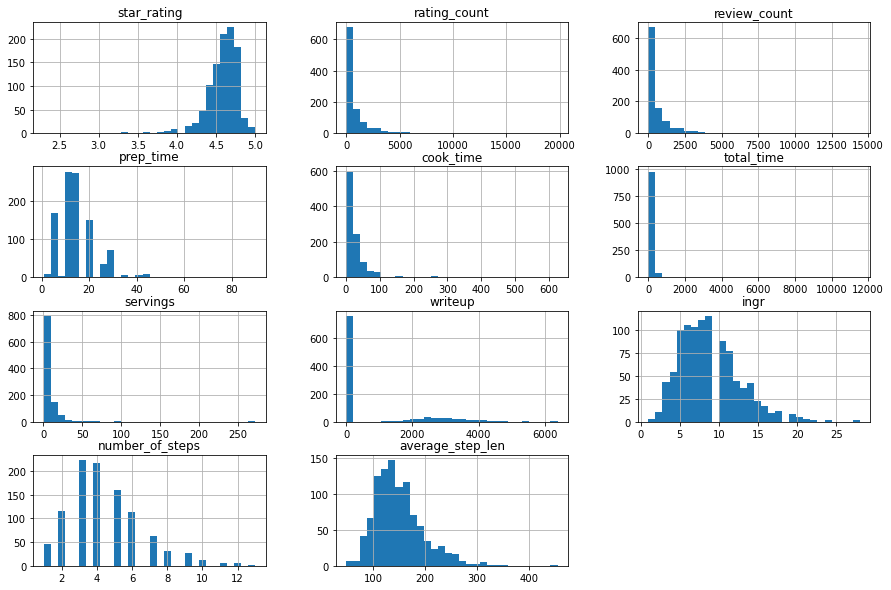

In [10]:
#checking distribution of all numberical variables
df.hist(bins=30,figsize=(15,10))
plt.show()

The histograms help to visualise outliers as well. Servings, ingredients, cook time, and rating have some values that are very high compared to the distribution. We looked into those to make sure our data made sense.

In [17]:
#outlier investigation - 250 servings?

df.iloc[df.servings.sort_values()[-1:].index]
#272 servings is a bulk salsa recipe. this makes sense

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
559,The Best Canning Salsa,4.3,60.0,54.0,25.0,35.0,815.0,272.0,2157,12,"Combine tomatoes, onions, vinegar, tomato past...",appetizers-and-snacks,8,176.5


In [18]:
#there's a recipe with a lot of ingredients, what is it?

df.iloc[df.ingr.sort_values()[-1:].index]
#after a manual check the chili recipe does actually have 28 ingredients.

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
199,Best Damn Chili,4.7,681.0,534.0,30.0,135.0,165.0,12.0,4169,28,Heat oil in a large pot over medium heat; cook...,soups-stews-and-chili,5,232.8


In [23]:
#there's a recipe with a long cook time, what is it?

df.iloc[df.cook_time.sort_values()[-1:].index]

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
528,Amazing Apple Butter,4.9,16.0,13.0,10.0,625.0,640.0,48.0,0,8,Combine apples and apple juice in a stockpot; ...,healthy-recipes,9,211.666667


In [64]:
#there's a recipe with a long total time, what is it?

df.iloc[df.total_time.sort_values()[-1:].index]

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
328,Dry Brine Turkey,4.8,18.0,15.0,15.0,150.0,11535.0,15.0,0,5,Pat turkey dry with paper towels. Season the i...,main-dish,9,162.555556


In [22]:
#what has the lowest rating?

df.iloc[df.star_rating.sort_values()[:1].index]
#after a manual check the chili recipe does actually have 28 ingredients.

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
939,Baked Banana Chips,2.3,9.0,9.0,10.0,2.0,135.0,2.0,0,2,Preheat the oven to 225 degrees F (110 degrees...,fruits,6,112.833333


In [27]:
#outlier check - long recipe writeup?

df.iloc[df.average_step_len.sort_values()[-1:].index]
#after a manual check the chili recipe does actually have 28 ingredients.

,recipe_title,star_rating,rating_count,review_count,prep_time,cook_time,total_time,servings,writeup,ingr,steps,category,number_of_steps,average_step_len
998,Raspberry Chipotle Sauce,4.6,40.0,35.0,10.0,30.0,1.0,8.0,0,9,Heat olive oil in a skillet over medium heat. ...,vegetables,1,455.0


At this point the data appeared to be sound - these recipes are definitely outliers, but they still make sense in the context of the recipe. Because of this, we decided to leave them in our dataset. 

we then started looking into correlations.

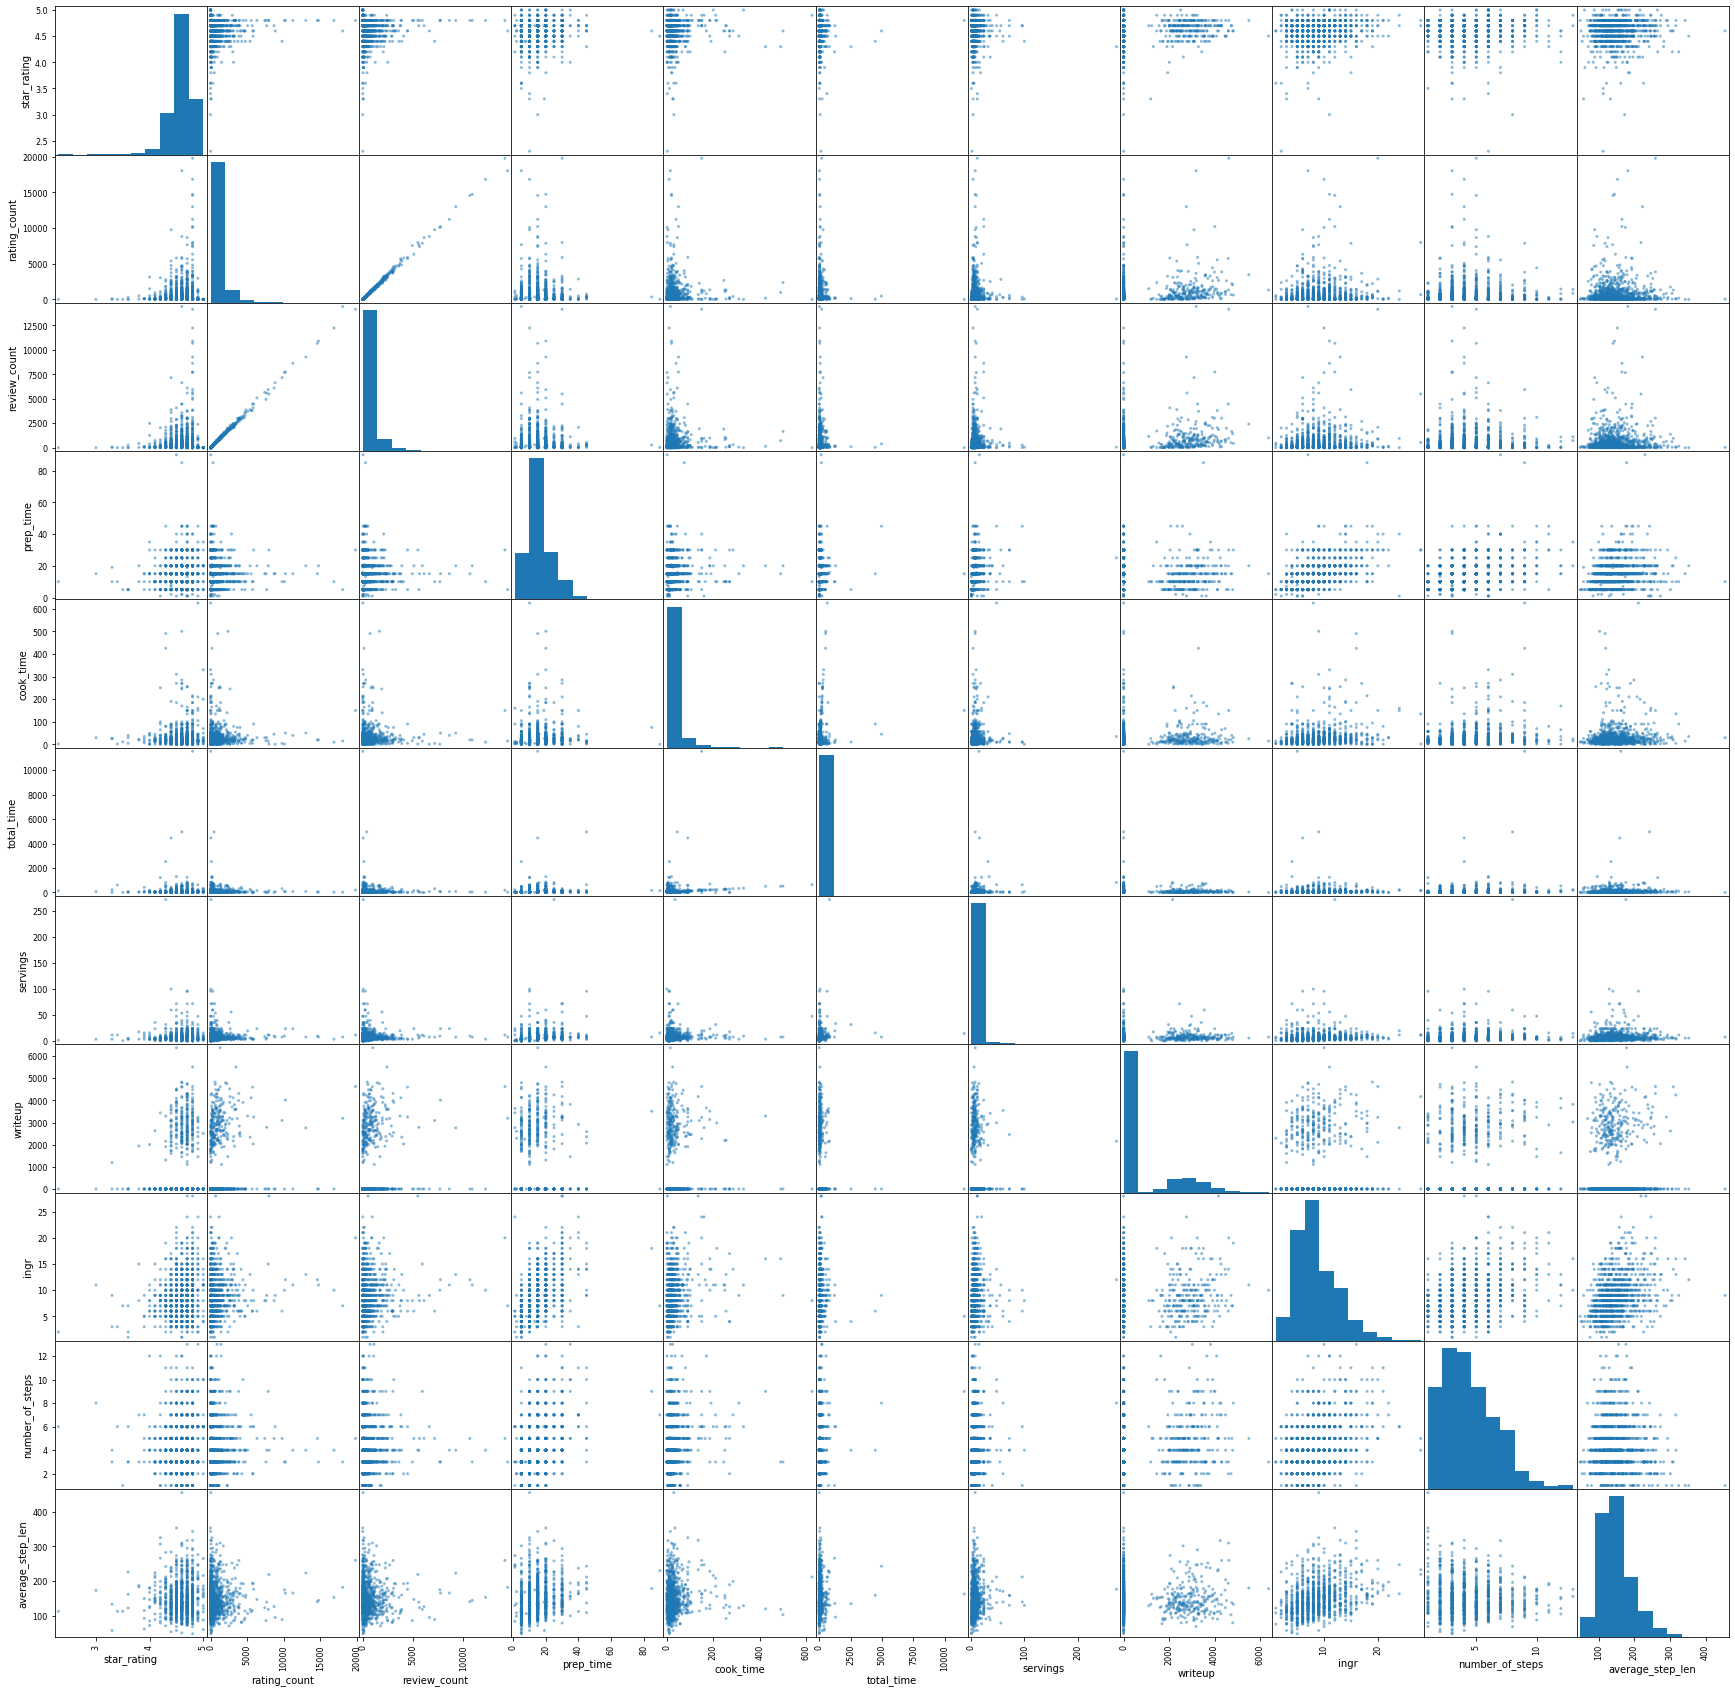

In [28]:
#Scatter matrix
fig = pd.plotting.scatter_matrix(frame = df, figsize = (30,30))

We looked into categorical distributions afterwards. There is a lack of recipes under the dinner category - this is because a lot of the duplicate recipes that were dropped likely belonged to multiple categories, but got dropped from the "dinner" during data cleaning. This is something we note for the future.

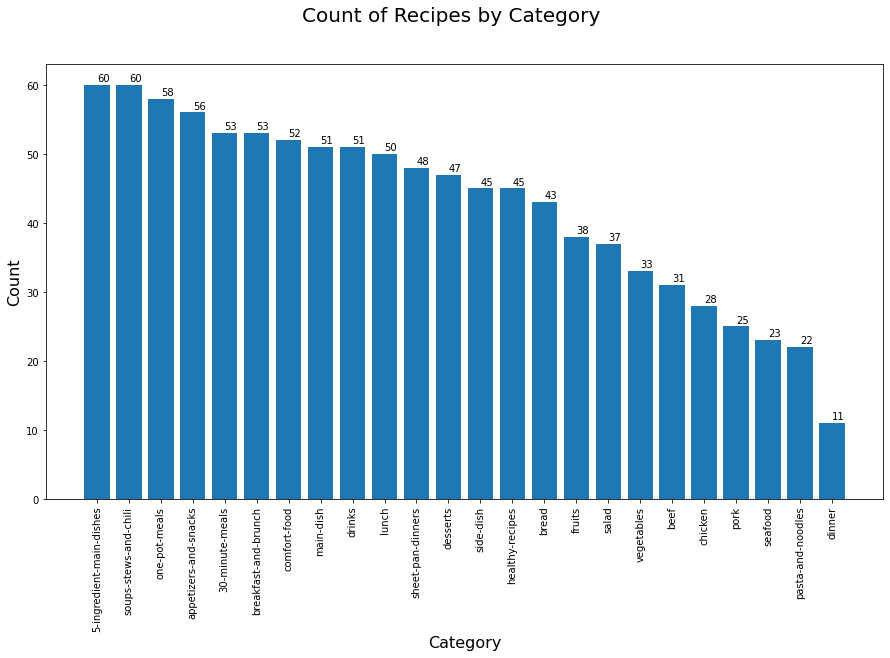

In [66]:
#Counts of categories
f1, ax = plt.subplots(figsize =(15, 8))
x= df['category'].value_counts().index
y=df['category'].value_counts()
ax.bar(x, y)
plt.xticks(rotation=90)
plt.suptitle('Count of Recipes by Category', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Category', fontsize=16)

for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j+0.5))
    
plt.show()

We looked at the distribution on ratings within the two biggest categories, 5 Ingredient Main Dishes, and Soups, Stews, and Chillis. There is a right skew on the ratings of both datasets.

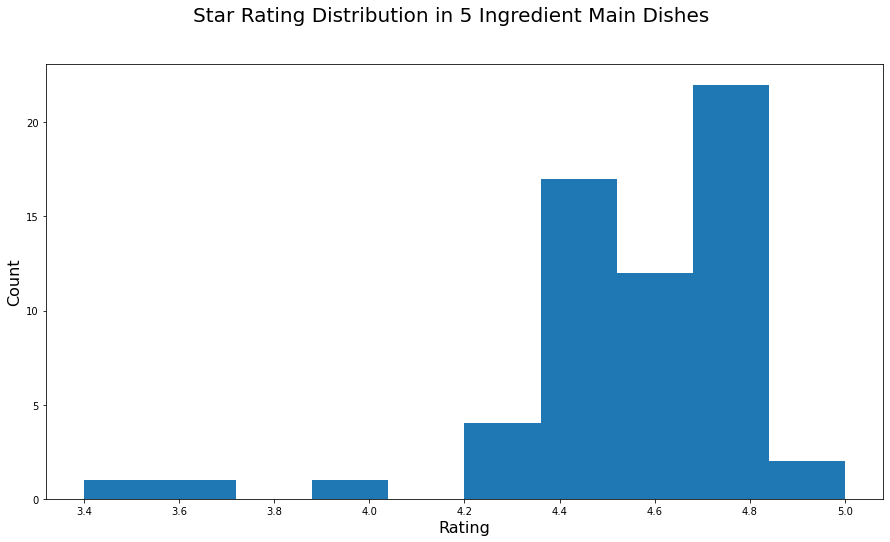

In [48]:
#Distribution of Category rating
f3, ax = plt.subplots(figsize =(15, 8))
ax.hist(df[df['category'] == '5-ingredient-main-dishes']['star_rating'])
plt.suptitle('Rating Distribution in 5 Ingredient Main Dishes', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Rating', fontsize=16)
plt.show()

Text(0.5, 0, 'Rating')

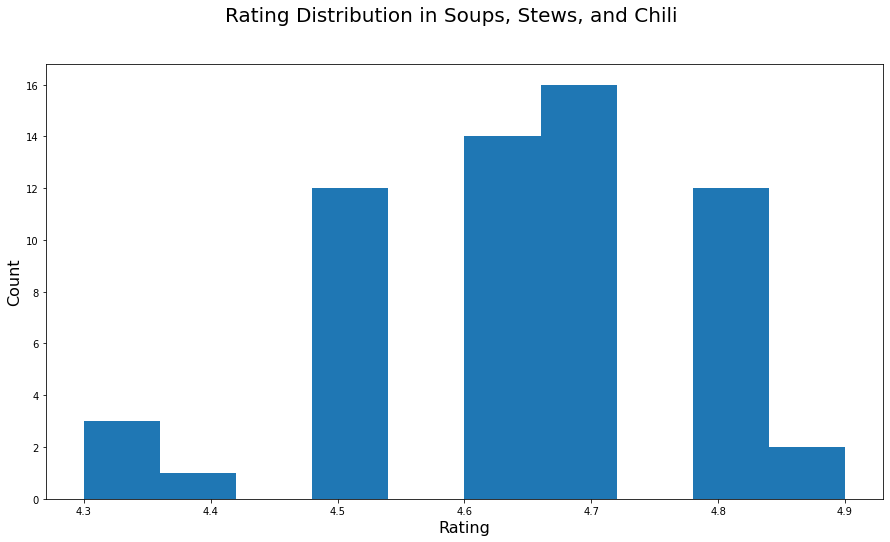

In [53]:
#Distribution of Soup rating
f4, ax = plt.subplots(figsize =(15, 8))
ax.hist(df[df['category'] == 'soups-stews-and-chili']['star_rating'])
plt.suptitle('Rating Distribution in Soups, Stews, and Chili', fontsize=20)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Rating', fontsize=16)

We then looked into some of the hypotheses we proposed. We hypothesized that there was a correlation between step number and recipe complexity, which might have an impact on rating:

Text(0.5, 0, 'Rating')

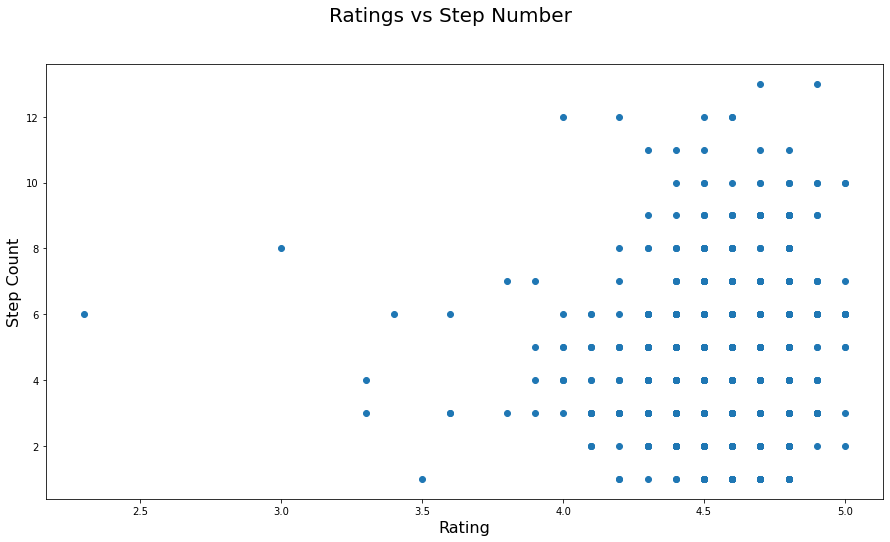

In [55]:
#Scatterplot rating vs num of step <- maybe how complex
f5, ax = plt.subplots(figsize =(15, 8))
ax.scatter(df['star_rating'],df['number_of_steps'])
plt.suptitle('Ratings vs Step Number', fontsize=20)
plt.ylabel('Step Count', fontsize=16)
plt.xlabel('Rating', fontsize=16)

Total time may also indicate recipe complexity, which may have an impact on rating:

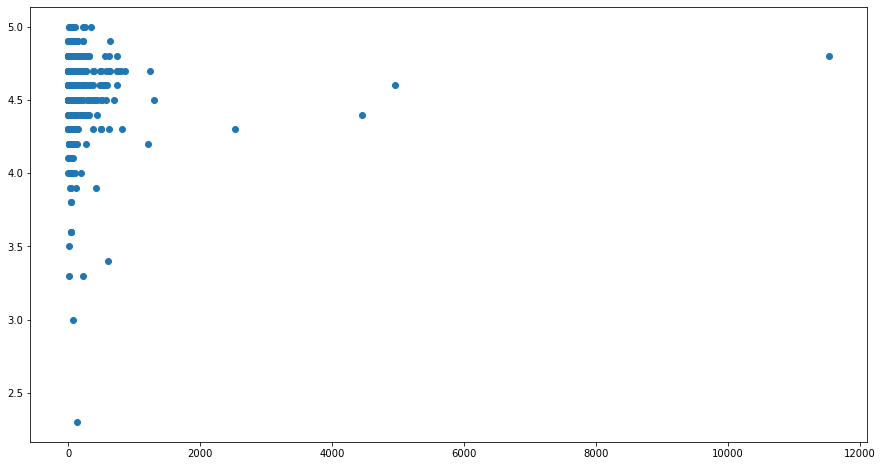

In [76]:
#Scatterplot rating vs total time <- maybe how complex
f6, ax = plt.subplots(figsize =(15, 8))
ax.scatter(df['total_time'],df['star_rating'])

There seems to be no strong correlation between time and rating, but there may be one between step number and rating. We worked to confirm this further with linear regression. 

                            OLS Regression Results                            
Dep. Variable:            star_rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.887
Date:                Fri, 18 Nov 2022   Prob (F-statistic):             0.0489
Time:                        20:30:05   Log-Likelihood:                 45.854
No. Observations:                1020   AIC:                            -87.71
Df Residuals:                    1018   BIC:                            -77.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.5580      0.017    2

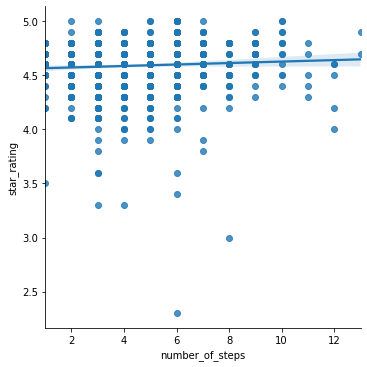

In [73]:
x, y = patsy.dmatrices('star_rating ~ number_of_steps', df)
mod_1 = sm.OLS(x, y)
res_1 = mod_1.fit()
print (res_1.summary())
sns.lmplot(data = df, y = 'star_rating', x = 'number_of_steps')

This analysis gives us a p-value of 0.049. With a cutoff of p=0.05, we accept that there may be a correlation between step number and star rating. This indicates that step number, and by extension the other step-related columns, may be good predictors of star rating. This is helpful information as we move into creating a model.

# Model